In [10]:
import pandas as pd
import numpy as np
import spacy
import seaborn as sns
import string
import matplotlib.pyplot as plt
import random
from spacy.lang.pt.stop_words import STOP_WORDS
from spacy.training import Example
from sklearn.metrics import confusion_matrix,accuracy_score

In [11]:
spacy.__version__

'3.8.2'

In [12]:
pln = spacy.load('pt_core_news_sm')

In [13]:
df_text_train = pd.read_csv('../Bases de dados/base_treinamento.txt',encoding='utf-8')

In [14]:
df_text_train.shape

(196, 2)

In [15]:
df_text_train.head(), df_text_train.tail()

(                             texto   emocao
 0        este trabalho é agradável  alegria
 1  gosto de ficar no seu aconchego  alegria
 2       fiz a adesão ao curso hoje  alegria
 3       eu sou admirada por muitos  alegria
 4                  adoro como você  alegria,
                                                  texto emocao
 191  estou chocado e amedrontado com este assassina...   medo
 192  é preciso afugenta com ímpeto este medo do inf...   medo
 193  políticos usam suas forças para afugentar e am...   medo
 194       o objetivo disso e apenas me amedrontar mais   medo
 195                                    isso me apavora   medo)

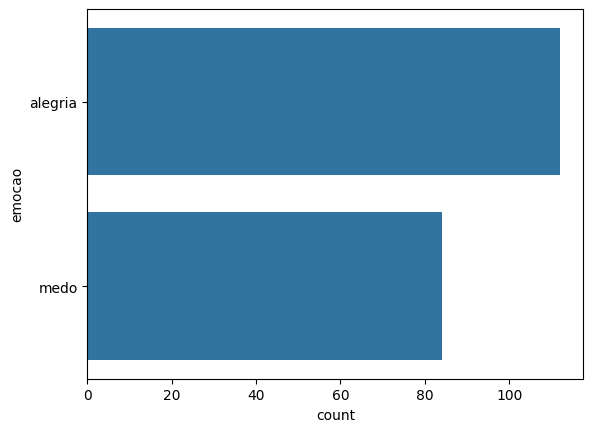

In [16]:
sns.countplot(df_text_train['emocao'], label='Count');

In [17]:
punctation = string.punctuation
punctation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
stop_words = STOP_WORDS

In [19]:
stop_words

{'a',
 'acerca',
 'ademais',
 'adeus',
 'agora',
 'ainda',
 'algo',
 'algumas',
 'alguns',
 'ali',
 'além',
 'ambas',
 'ambos',
 'antes',
 'ao',
 'aos',
 'apenas',
 'apoia',
 'apoio',
 'apontar',
 'após',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aqui',
 'aquilo',
 'as',
 'assim',
 'através',
 'atrás',
 'até',
 'aí',
 'baixo',
 'bastante',
 'bem',
 'boa',
 'bom',
 'breve',
 'cada',
 'caminho',
 'catorze',
 'cedo',
 'cento',
 'certamente',
 'certeza',
 'cima',
 'cinco',
 'coisa',
 'com',
 'como',
 'comprida',
 'comprido',
 'conhecida',
 'conhecido',
 'conselho',
 'contra',
 'contudo',
 'corrente',
 'cuja',
 'cujo',
 'custa',
 'cá',
 'da',
 'daquela',
 'daquele',
 'dar',
 'das',
 'de',
 'debaixo',
 'demais',
 'dentro',
 'depois',
 'des',
 'desde',
 'dessa',
 'desse',
 'desta',
 'deste',
 'deve',
 'devem',
 'deverá',
 'dez',
 'dezanove',
 'dezasseis',
 'dezassete',
 'dezoito',
 'diante',
 'direita',
 'disso',
 'diz',
 'dizem',
 'dizer',
 'do',
 'dois',
 'dos',
 'doze',
 'duas',
 'dá

In [20]:
len(stop_words)

416

In [21]:
pln

In [22]:
def preprocessing(text):
    text = text.lower()
    document = pln(text)
    list_preprocessing =[]
    for token in document:
        list_preprocessing.append(token.lemma_)
        
    list_preprocessing = [word for word  in list_preprocessing if word not in stop_words and word not in punctation]
    list_preprocessing = ' '.join([str(element)for element in list_preprocessing if not element.isdigit()])

    return list_preprocessing

In [23]:
list_result = preprocessing('Estou aprendendo 1 10 23 processamento de linguagem natural, curso em Curitiba')
list_result

'aprender processamento linguagem natural curso curitber'

In [24]:
df_text_train['texto'] = df_text_train['texto'].apply(preprocessing)

In [25]:
df_text_train

,texto,emocao
0,trabalho agradável,alegria
1,gostar ficar em o aconchego,alegria
2,fiz adesão a o curso hoje,alegria
3,admirar,alegria
4,adorar,alegria
...,...,...
191,chocado amedrontar assassinato brutal,medo
192,preciso afugentar ímpeto medo de o inferno,medo
193,político força afugentar amedrontar,medo
194,objetivo de isso amedrontar,medo


In [26]:
df_text_train_end = []
for text,emotion in zip(df_text_train['texto'],df_text_train['emocao']):
    if emotion == 'alegria':
        dic = ({"ALEGRIA":True,"MEDO":False})
    else:
        dic = ({"ALEGRIA":False,"MEDO":True})

    df_text_train_end.append([text,dic.copy()])

In [27]:
df_text_train_end

[['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['gostar ficar em o aconchego', {'ALEGRIA': True, 'MEDO': False}],
 ['fiz adesão a o curso hoje', {'ALEGRIA': True, 'MEDO': False}],
 ['admirar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cabelo macio', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cor de o olho', {'ALEGRIA': True, 'MEDO': False}],
 ['somo amável outro', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto afeição', {'ALEGRIA': True, 'MEDO': False}],
 ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto completamente amar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar', {'ALEGRIA': True, 'MEDO': False}],
 ['alívio', {'ALEGRIA': True, 'MEDO': False}],
 ['dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
 ['achar apaixonar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir animar', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto hoje', {'ALEGRIA': Tr

In [28]:
type(df_text_train_end[0][1])

dict

In [29]:
model = spacy.blank('pt')
model_categori = model.add_pipe('textcat')
model_categori.add_label('ALEGRIA')
model_categori.add_label('MEDO')
historic = []

In [ ]:
model.initialize()
for era in range(1000):
    random.shuffle(df_text_train_end)
    losses ={}
    for batch in spacy.util.minibatch(df_text_train_end,30):
        text = [model(text) for text,entities in batch]
        annotations = [{'cats':entities} for text, entities in batch]
        examples = [Example.from_dict(doc, annotation) for doc, annotation in zip(
            text, annotations
        )]
        model.update(examples,losses=losses)
    if era % 100 == 0:
        print(losses)
        historic.append(losses)

{'textcat': 1.7166938334703445}
{'textcat': 3.483222391076346e-11}
{'textcat': 5.004500584554136e-12}
{'textcat': 1.1412919288561647e-12}
{'textcat': 3.897342043816983e-13}
{'textcat': 1.7787084569717126e-13}
{'textcat': 8.014054423197267e-14}


In [60]:
historic_loss=[]
for i in historic:
    historic_loss.append(i.get('textcat'))

historic_loss = np.array(historic_loss)

Text(0, 0.5, 'Error')

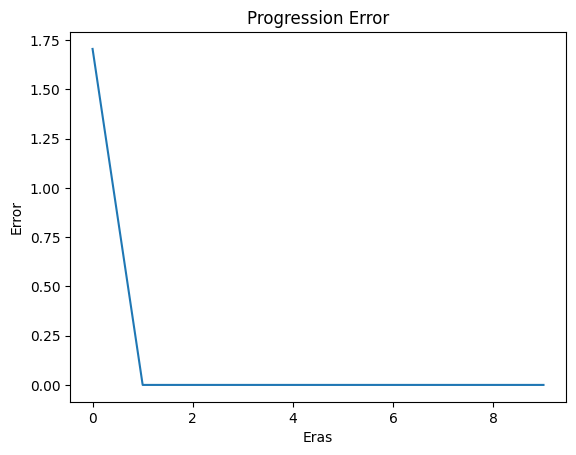

In [61]:
plt.plot(historic_loss)
plt.title('Progression Error')
plt.xlabel('Eras')
plt.ylabel('Error')

In [62]:
model.to_disk('model')

In [63]:
model_carring = spacy.load('model')
model_carring

In [68]:
positive_text = 'eu adoro a cor dos seus olhos'
negative_text ='estou com medo dele'

In [69]:
positive_text = preprocessing(positive_text)
positive_text

'adorar cor de o olho'

In [70]:
predict = model_carring(positive_text)
predict.cats

{'ALEGRIA': 1.0, 'MEDO': 1.819174322292838e-08}

In [71]:
predict=model_carring(preprocessing(negative_text))
predict.cats,preprocessing(negative_text) 

({'ALEGRIA': 9.126107869406042e-08, 'MEDO': 0.9999998807907104}, 'medo de ele')

In [83]:
predictions=[]
for text in df_text_train['texto']:
    print(preprocessing(text))
    predict = model_carring(preprocessing(text))
    predictions.append(predict.cats)

trabalho agradável
gostar ficar aconchego
fiz adesão curso hoje
admirar
adorar
adorar cabelo macio
adorar cor olho
somo amável outro
sinto afeição
querer agradar filho
sinto completamente amar
amar
alívio
dor amenizar finalmente
achar apaixonar
amar maravilhoso
sentir animar
sinto hoje
luar belo
dia bonito
afortunar
maravilha mundo
recebi carinho hoje colega
sentir reconfortar hoje
amigo
contente resultado teste
pinturar brilhante
água abundânciar
roupa delicar
comediante
bondader vir
amor lir
amizade durar
eufórico notícia
realmente fiel
festa comemorar aniversário
graças enxerguei certo
escolha
incrível belo
engraçar explicar
emocionante
cativar olhar
loucamente apaixonar
dúvida
rodear abraço
vejo estrela
sintar sol
sorrir orelha orelhar
valer pena
finalmente colocar amor
dançar noite adentro
amor brilhante
toquar coração durante
amigo companheiro
trazer volta vido
sonho doce
adorar doce frutar
suco favorito
agradecer ajuda
enorme prazer equipe
trabalhar equipe
sinto flutuar ar
brisa

In [84]:
predictions

[{'ALEGRIA': 1.0, 'MEDO': 9.724123728460654e-09},
 {'ALEGRIA': 0.9999997615814209, 'MEDO': 2.6450163659319514e-07},
 {'ALEGRIA': 1.0, 'MEDO': 5.394223734356274e-09},
 {'ALEGRIA': 1.0, 'MEDO': 2.125252684948009e-08},
 {'ALEGRIA': 1.0, 'MEDO': 3.640069579091687e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.0664816585403969e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.2557000772517313e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.6712702333165907e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.2312413311121873e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.9565702774903002e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.1009295697306243e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.4580339985647015e-09},
 {'ALEGRIA': 1.0, 'MEDO': 7.401265378348398e-09},
 {'ALEGRIA': 1.0, 'MEDO': 4.069710257681436e-08},
 {'ALEGRIA': 0.9999998807907104, 'MEDO': 7.777202171155295e-08},
 {'ALEGRIA': 1.0, 'MEDO': 8.09773492704835e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.704714236439031e-08},
 {'ALEGRIA': 1.0, 'MEDO': 5.875421926759827e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.4460767694401966e-08},
 {'ALEGRIA':

In [85]:
predict_ =[]

for predict_i in predictions:
    if predict_i['ALEGRIA'] > predict_i['MEDO']:
        predict_.append('alegria')
    else:
         predict_.append('medo')

In [87]:
predict_

['alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'medo',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'medo'

In [7]:
true_ansewears = df_text_train['emocao'].values
true_ansewears

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [9]:
accuracy_score(true_ansewears,predict_)

NameError: name 'predict_' is not defined